# OASIS-2 Data Analysis  
### Introduction to OASIS-2 Dataset
The [OASIS-2 (Open Access Series of Imaging Studies)](https://sites.wustl.edu/oasisbrains/home/oasis-2/) dataset offers invaluable insights into the aging brain by providing longitudinal MRI data from a diverse group of older adults. This dataset, a continuation of the original OASIS project, specifically focuses on both nondemented and demented individuals, making it a critical resource for studying the progression of cognitive decline and diseases such as Alzheimer's.

### Dataset description
This dataset comprises longitudinal data from 150 participants, aged between 60 and 96 years. Each participant underwent MRI scanning during at least two separate visits, spaced at least one year apart, resulting in a total of 373 imaging sessions. For each visit, 3 to 4 individual T1-weighted MRI scans were conducted in single scan sessions. The cohort includes both men and women, all of whom are right-handed.

Out of the 150 participants, 72 remained nondemented throughout the study period. In contrast, 64 participants were diagnosed with dementia at their initial visit and continued to show signs of dementia in subsequent scans; this group includes 51 individuals with mild to moderate Alzheimer’s disease. Additionally, 14 participants, initially classified as nondemented, later progressed to a demented state in follow-up visits.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
from scipy import stats

In [2]:
data = pd.read_csv("./OASIS 2/oasis_longitudinal_demographics.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


### Dataset structure
The dataset is organized with multiple columns capturing various demographic, clinical, and imaging data for each participant. The following table provides an explanation of each column and the types of values they contain:

| Column | Meaning | Value | DataType |
|--------|---------|-------|----------|
|Subject ID |	Unique identifier for each participant | Example: OAS2_0001 | String/Text |
|MRI ID |	Unique identifier for each MRI scan session for a participant |	Example: OAS2_0001_MR1 | String/Text |
|Group |	Clinical status of the participant at the time of the scan |	Nondemented, Demented or Converted | String/Text |
|Visit |	The visit number for the MRI session | Example: 1 | Integer |
|MR Delay	| Delay in days between the first visit and the current MRI session |	Example: 590 | Integer |
|M/F |	Gender of the participant |	M (Male) or F (Female) | String/Text |
|Hand	| Dominant hand of the participant |	R (Right-handed) or L (Left-handed) | String/Text |
|Age |	Age of the participant at the time of the MRI session |	Example: 78 | Integer |
|EDUC |	Years of Education |	Range: 0 to highest recorded value | Integer |
|SES |	Socioeconomic Status |	Range: 1 (lowest) to 5 (highest) | Integer |
|MMSE |	Mini Mental State Examination score |	Range: 0 to 30. Where a value lower than 24 indicates cognitive impairment  | Integer |
|CDR | Clinical Dementia Rating |	0 (no dementia), 0.5 (very mild AD), 1 (mild AD), 2 (moderate AD) | Float/Decimal |
|eTIV |	Estimated Total Intracranial Volume (mm³) |	Example: 1529 | Integer |
|nWBV	| Normalized Whole Brain Volume	| Percentage of all voxels labeled as gray or white matter | Float/Decimal |
|ASF |	Atlas Scaling Factor | Computed scaling factor transforming native-space brain and skull to the atlas target | Float/Decimal |

In [3]:
print("Total Rows & Columns: ", data.shape)

print("\nExample data from first 3 participants:")
data.head(7)

Total Rows & Columns:  (373, 15)

Example data from first 3 participants:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462


### Statistic summary

The average age of participants is 77 years, with a range spanning from 60 to 98 years, indicating a senior cohort with some variation in age. Most individuals have received one or two MRI scans, with a noticeable range in the delay between visits, from no delay to over 7 years, suggesting inconsistent scanning schedules. Education levels are fairly diverse, averaging around 14.6 years, while socioeconomic status ranges from low to moderate, with the majority falling in the middle of the scale. Cognitive function, as measured by the MMSE, indicates generally high mental state scores, with some variability, as shown by the standard deviation of 3.7. The Clinical Dementia Rating (CDR) reveals that the majority of participants have no or very mild cognitive impairment, with the average CDR score being low. Brain volume metrics such as estimated total intracranial volume (eTIV) and normalized whole brain volume (nWBV) exhibit some variation, reflecting differences in cranial and brain sizes. Finally, the Atlas Scaling Factor (ASF) shows moderate variation in the scaling of brain scans, which may reflect different degrees of alignment with the target atlas. Overall, while the participants show a broad age range and some variability in health metrics, the data suggests a relatively healthy cohort, with few severe cognitive impairments.

In [4]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Data cleaning and preprocessing
In this study, the dataset underwent several preprocessing steps to ensure its quality and completeness.

1. The first step involved checking for missing values. Using the isnull() function, it was confirmed that there were missing values in certain columns. The count of missing values in each column was then printed to assess which variables required imputation.

In [5]:
data.isnull().any().any()

np.True_

In [6]:
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


2. Next, duplicate entries were examined using the duplicated() function. The dataset was found to contain some duplicated rows, which were noted and addressed.

In [7]:
duplicates = data.duplicated().sum()

print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


3. To handle missing data, specific imputation strategies were applied to different columns. For the "SES" column, which had missing values, these were filled using the median value, as this measure is less sensitive to outliers. For the "MMSE", missing values were replaced with the mean value of the column, ensuring that the imputed values were consistent with the overall distribution of scores.

In [8]:
data["SES"] = data["SES"].fillna(data["SES"].median())
data["MMSE"] = data["MMSE"].fillna(data["MMSE"].mean())

### Dataset Analysis

To verify the accuracy of the data reported on the OASIS-2 website, we aim to assess the number of individuals diagnosed with Alzheimer's disease (AD) based on the dataset. As some individuals may have attended multiple visits, we restrict our analysis to data from a single visit per participant. By isolating unique records, we ensure that repeated measurements do not bias the assessment and that our results accurately reflect the distribution of Alzheimer's diagnoses within the population.


| Results | OASIS 2 | Dataset Analysis|
|--------|---------|-------|
|Nondemented |	72 | 72 |
|Demented |	64 | 64 |
|Converted |	14 | 14 |

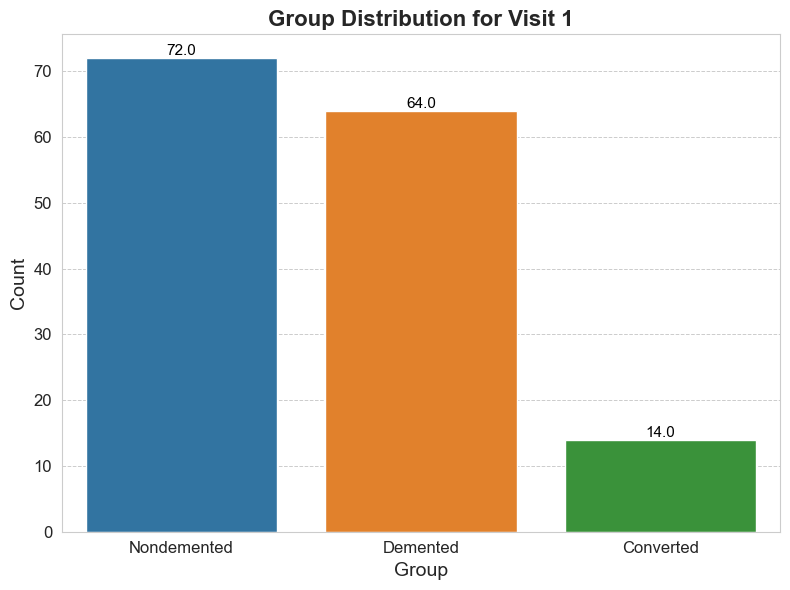

In [9]:
sns.set_style("whitegrid")

ex_data = data.loc[data["Visit"] == 1]

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x="Group", data=ex_data, hue="Group", dodge=False, palette="tab10", legend=False
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="center",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax.set_title("Group Distribution for Visit 1", fontsize=16, fontweight="bold")
ax.set_xlabel("Group", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.tick_params(axis="both", labelsize=12)

plt.grid(visible=True, which="major", axis="y", linestyle="--", linewidth=0.7)

plt.tight_layout()
plt.show()

To simplify the analysis, we will categorise participants into two groups: "Nondemented" and "Demented." The original dataset includes a third group labelled "Converted", representing individuals who transitioned from a nondemented to a demented state. 

For the purpose of this study, we will reclassify the "Converted" group as "Demented." This approach aligns with the goal of distinguishing between individuals with and without dementia while accounting for those who have shown progression into the demented state.

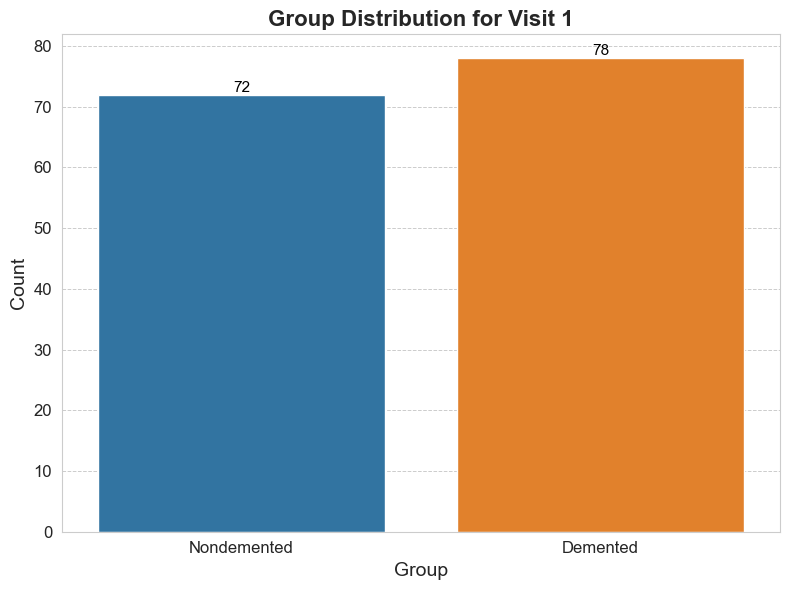

In [10]:
ex_data = data.loc[data["Visit"] == 1].copy() 

data["Group"] = data["Group"].replace("Converted", "Demented")
ex_data["Group"] = ex_data["Group"].replace("Converted", "Demented")

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x="Group", data=ex_data, hue="Group", dodge=False, palette="tab10", legend=False
)

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="center",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax.set_title("Group Distribution for Visit 1", fontsize=16, fontweight="bold")
ax.set_xlabel("Group", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.tick_params(axis="both", labelsize=12)

plt.grid(visible=True, which="major", axis="y", linestyle="--", linewidth=0.7)

plt.tight_layout()
plt.show()

To improve the understanding of the dataset and explore potential factors contributing to dementia, we will examine the cases based on three key demographic characteristics: gender, age, and education level. These variables can provide valuable insights into the distribution of dementia across different subgroups, and help identify patterns or trends that may be relevant to the study.

In [11]:
def bar_chart(
    feature, title="Feature Distribution by Group", xlabel="Group", ylabel="Count"
):
    Demented = ex_data[ex_data["Group"] == "Demented"][feature].value_counts()
    Nondemented = ex_data[ex_data["Group"] == "Nondemented"][feature].value_counts()

    data_bar = pd.DataFrame([Demented, Nondemented]).fillna(
        0
    ) 
    data_bar.index = ["Demented", "Nondemented"]

    ax = data_bar.plot(
        kind="bar",
        stacked=True,
        figsize=(8, 5),
        color=["#3498db", "#e74c3c"],
        alpha=0.85,
    ) 

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0: 
                ax.annotate(
                    f"{int(height)}",
                    (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha="center",
                    va="center",
                    fontsize=11,
                    color="white",
                )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.tick_params(axis="x", labelsize=12, rotation=0)
    ax.tick_params(axis="y", labelsize=12)
    ax.legend(title=feature, fontsize=11, title_fontsize=12)
    ax.grid(visible=True, which="major", axis="y", linestyle="--", linewidth=0.7)

    print(data_bar)
    plt.tight_layout()
    plt.show()

##### Gender
We will first assess the distribution of dementia by gender. Gender differences in dementia prevalence have been observed in many studies (Lin et al., 2015; Ferretti et al., 2020; Kolahchi et al., 2024), so analysing this variable allows us to explore whether there is a gender-related pattern in the dataset. This categorisation can help to contextualise findings and potentially highlight any gender-specific factors that might contribute to the onset or progression of dementia.

By also comparing the distribution of CDR scores across these two gender categories, we can assess whether there are significant differences in dementia severity between males and females. Such differences are critical for understanding how gender may influence dementia progression, and might reveal underlying physiological, genetic, or social factors that warrant further investigation. These visual insights will contribute to a more nuanced interpretation of gender's role in dementia studies and could potentially guide future research into gender-specific treatment or prevention strategies.

M/F           M   F
Demented     40  38
Nondemented  22  50


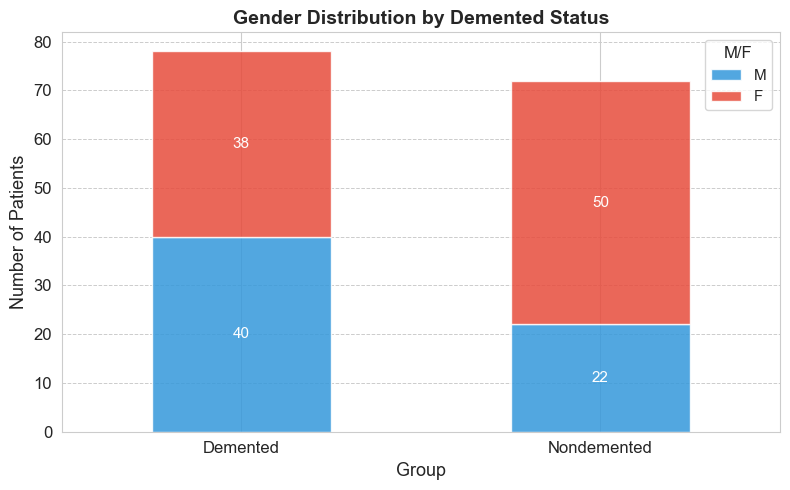

In [12]:
bar_chart(
    "M/F",
    title="Gender Distribution by Demented Status",
    xlabel="Group",
    ylabel="Number of Patients",
)

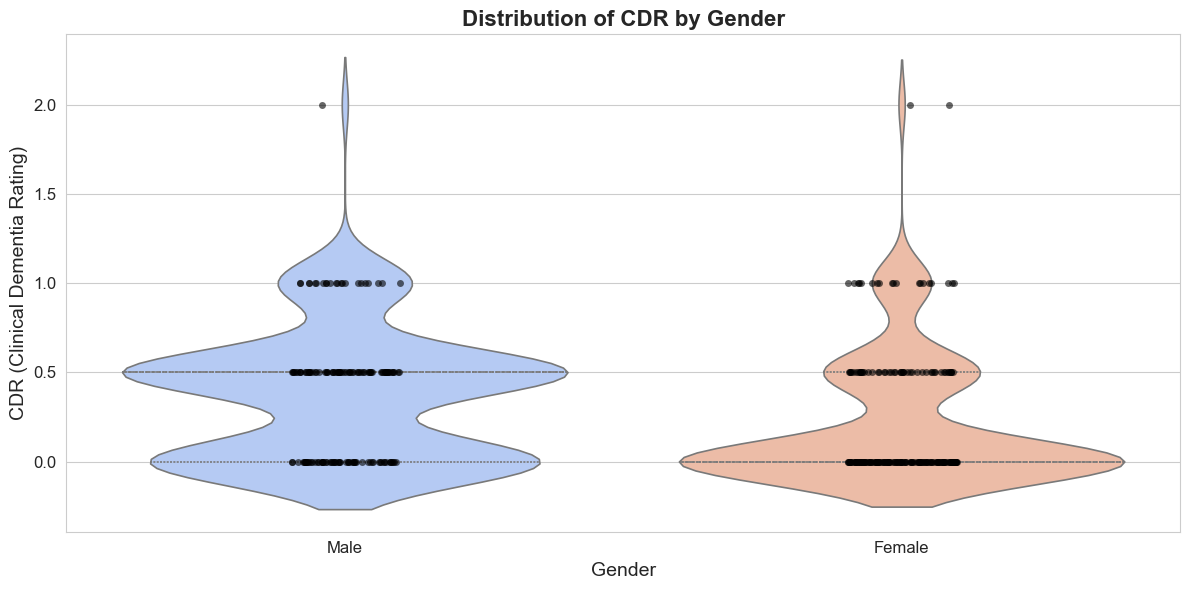

In [13]:
palette = sns.color_palette("coolwarm", n_colors=2)

plt.figure(figsize=(12, 6))

sns.violinplot(
    x="M/F",
    y="CDR",
    data=data,
    hue="M/F",
    palette=palette,
    inner="quartile",
    linewidth=1.2,
    dodge=False,
)

sns.stripplot(
    x="M/F",
    y="CDR",
    data=data,
    color="black",
    alpha=0.6,
    jitter=True,
    dodge=True,
)

plt.title("Distribution of CDR by Gender", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("CDR (Clinical Dementia Rating)", fontsize=14)
plt.xticks(fontsize=12, ticks=[0, 1], labels=["Male", "Female"])
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

##### Age
Age is a well-established risk factor for dementia, as many neurodegenerative diseases show a strong correlation with advancing age (Franke et al., 2010; Beheshti et al., 2020). To investigate this relationship, we categorized participants into two groups: those aged 77 years or older, and those younger than 77. The age threshold of 77 was selected because it corresponds to the median age of the sample, offering a meaningful way to segment the population into age-related groups. This division enables an exploration of whether older age, specifically, plays a significant role in dementia diagnosis. Given the age-dependent nature of many neurodegenerative diseases, categorizing the data in this manner provides valuable insights into how age influences dementia risk and progression.

To visualize the data, a variety of plots were employed. Bar charts highlighted participant distribution by age group and dementia status, revealing potential age-related patterns in disease prevalence. Violin and strip plots provided detailed insights into age variability across Clinical Dementia Rating (CDR) categories (Jun et al., 2023), while Kernel Density Estimation (KDE) plots illustrated age distributions by dementia status at baseline. Together, these visualizations offer a comprehensive view of age as it relates to dementia, emphasizing both central tendencies and variability.

Descriptive statistics further complemented the analysis, summarizing age differences between demented and non-demented groups. The mean ages were similar, but variations in standard deviation and range pointed to subtle differences. A heatmap was used to enhance the accessibility of these statistics, making patterns more interpretable.

Despite its strengths, the approach has limitations. The fixed threshold of 77 years, though statistically convenient, may not fully capture individual or regional variations in aging. Additionally, focusing solely on age overlooks the multifactorial nature of dementia. These findings provide valuable insights but underscore the need for further research into the complex interplay between age and dementia.

Age Group    Younger than 77  77 and Older
Demented                  45            33
Nondemented               39            33


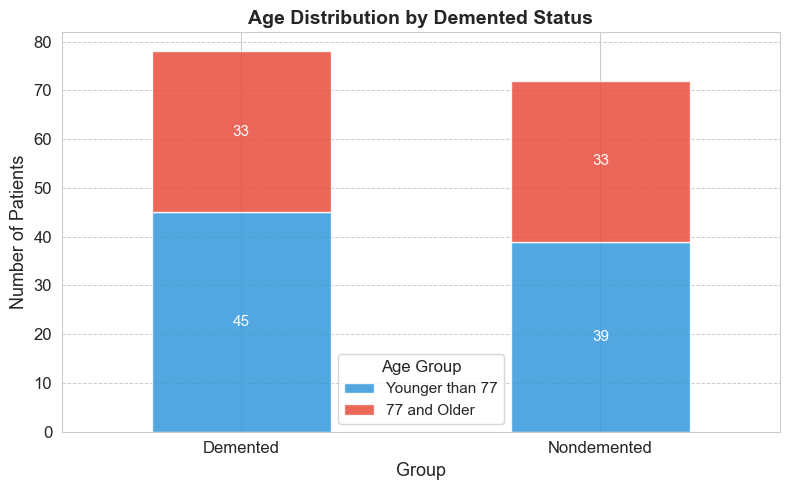

In [14]:
ex_data["Age Group"] = np.where(ex_data["Age"] >= 77, "77 and Older", "Younger than 77")

bar_chart(
    "Age Group",
    title="Age Distribution by Demented Status",
    xlabel="Group",
    ylabel="Number of Patients",
)

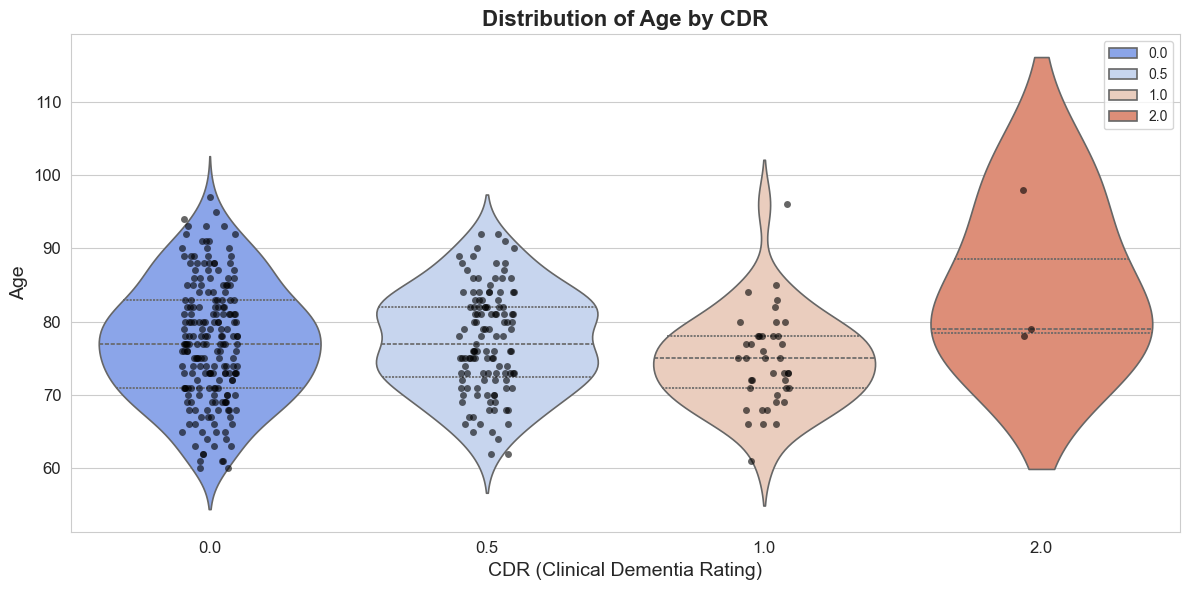

In [15]:
palette = sns.color_palette("coolwarm", n_colors=4)

plt.figure(figsize=(12, 6))

sns.violinplot(
    x="CDR",
    y="Age",
    data=data,
    hue="CDR",
    palette=palette,
    inner="quartile",
    linewidth=1.2,
)

sns.stripplot(
    x="CDR", 
    y="Age", 
    data=data, 
    color="black", 
    alpha=0.6, 
    jitter=True, 
    dodge=False
)

plt.title("Distribution of Age by CDR", fontsize=16, fontweight="bold")
plt.xlabel("CDR (Clinical Dementia Rating)", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

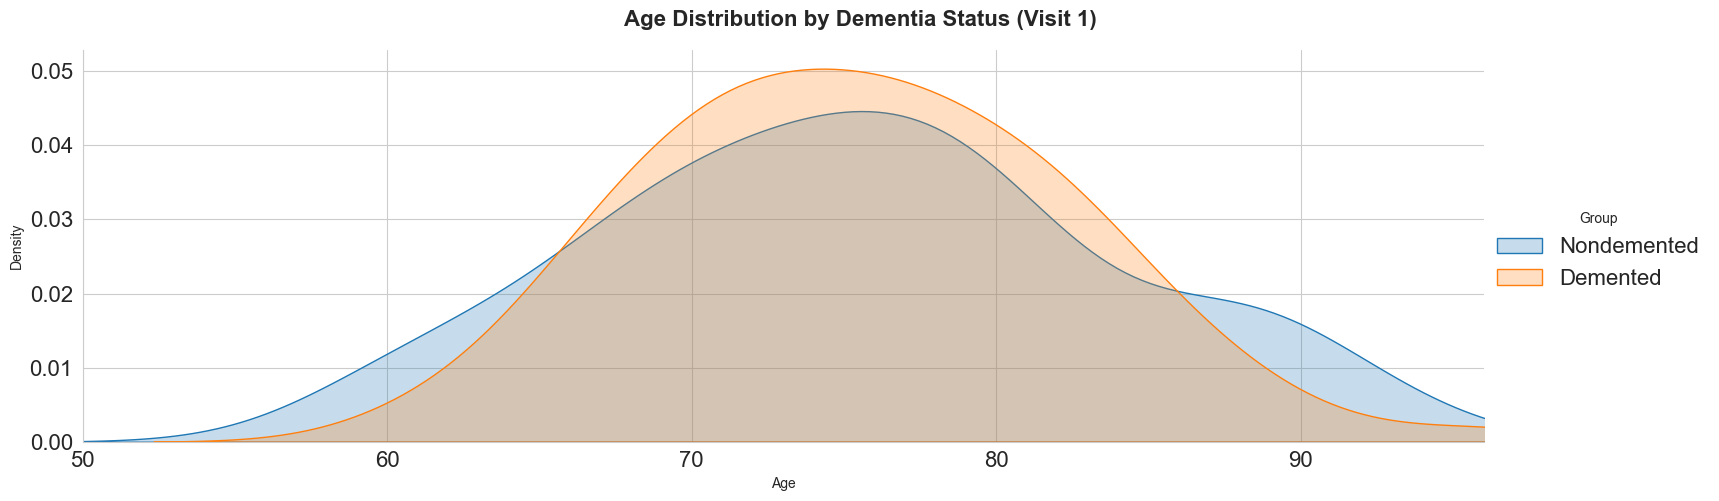

             count       mean       std   min   25%   50%   75%   max
Group                                                                
Demented      78.0  75.461538  6.905094  61.0  70.0  75.5  80.0  96.0
Nondemented   72.0  75.430556  8.232239  60.0  69.0  75.0  81.0  93.0


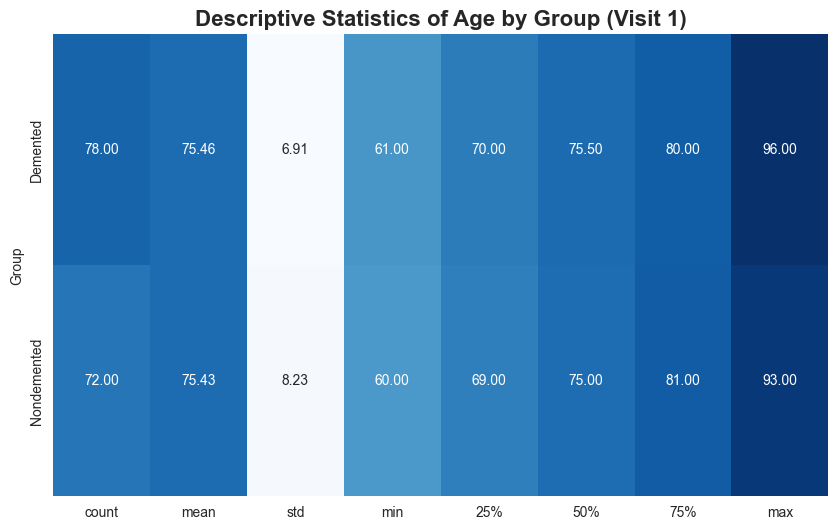

In [16]:
facet = sns.FacetGrid(ex_data, hue="Group", aspect=3, height=5)
facet.map(sns.kdeplot, "Age", fill=True)
facet.set(xlim=(50, ex_data["Age"].max()))
facet.set_axis_labels("Age", "Density")
facet.figure.suptitle(
    "Age Distribution by Dementia Status (Visit 1)", fontsize=16, fontweight="bold"
)
facet.add_legend(title="Group", prop={"size": 16})
facet.ax.tick_params(labelsize=16)
facet.set_titles(fontsize=16) 
facet.set_axis_labels(fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

age_stats = ex_data.groupby("Group")["Age"].describe()
print(age_stats)

plt.figure(figsize=(10, 6))
sns.heatmap(age_stats, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title(
    "Descriptive Statistics of Age by Group (Visit 1)", fontsize=16, fontweight="bold"
)
plt.show()

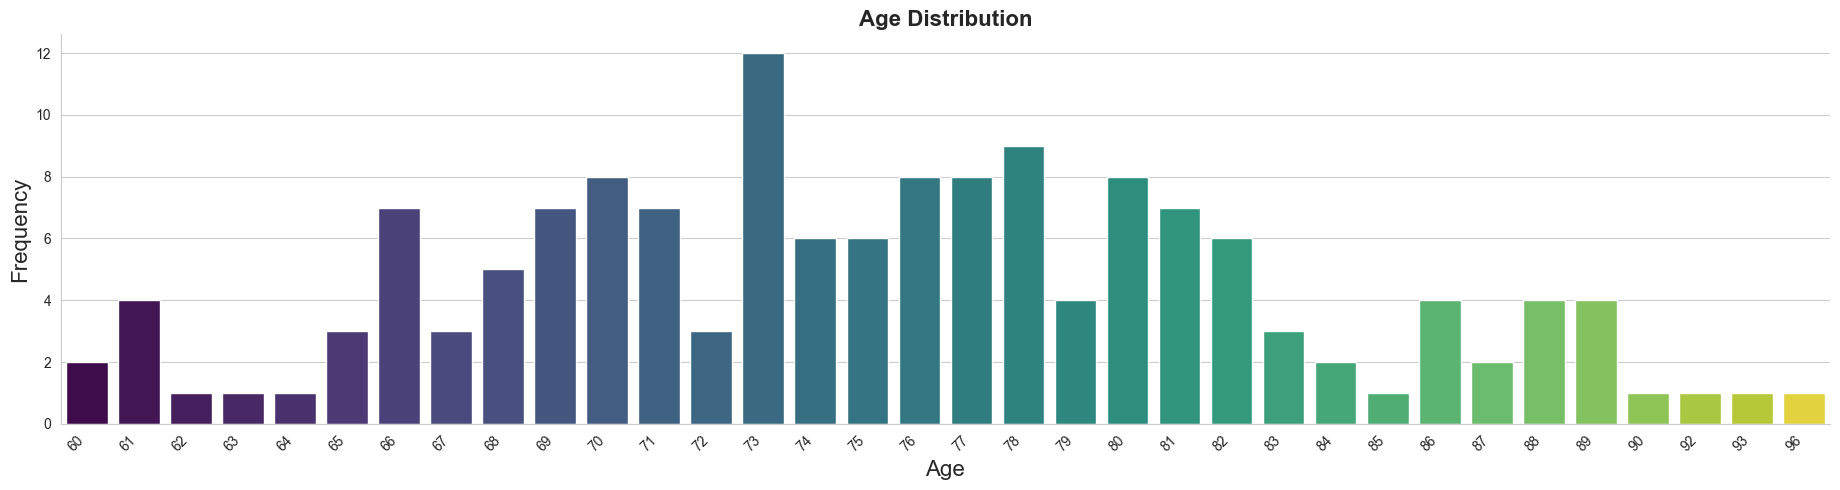

In [17]:
ax = sns.countplot(x="Age", data=ex_data, hue="Age", palette="viridis", legend=False)

ax.figure.set_size_inches(18.5, 5)

ax.set_title("Age Distribution", fontsize=16, fontweight="bold")
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

plt.xticks(rotation=45, ha="right")

sns.despine()
plt.tight_layout()
plt.show()

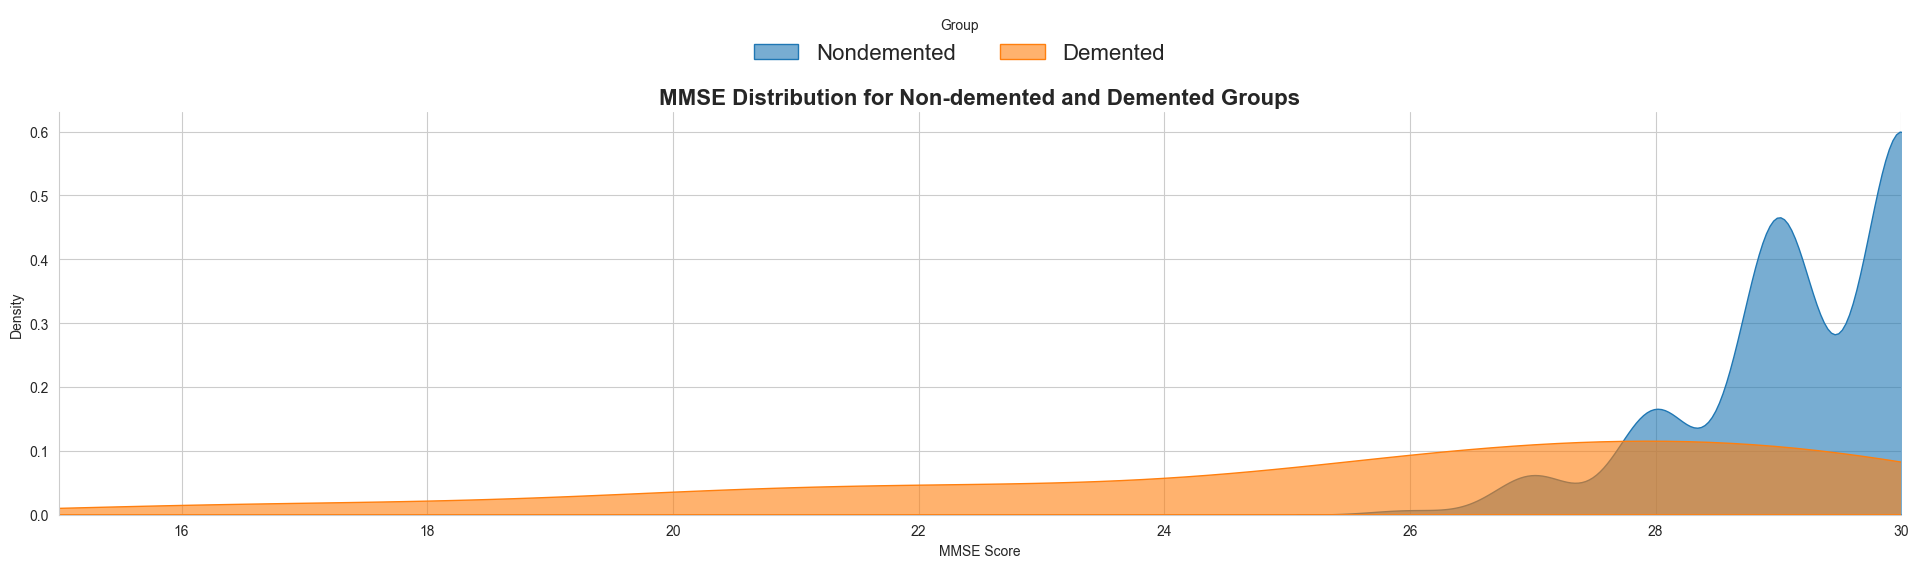

In [18]:
facet = sns.FacetGrid(data, hue="Group", aspect=3, height=5, legend_out=True)
facet.map(sns.kdeplot, "MMSE", fill=True, alpha=0.6)
facet.set(xlim=(0, data["MMSE"].max()), xlabel="MMSE Score", ylabel="Density")
facet.add_legend(
    title="Group",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    prop={"size": 16},
)
plt.title(
    "MMSE Distribution for Non-demented and Demented Groups",
    fontsize=16,
    fontweight="bold",
)
plt.xlim(15, 30)
plt.tight_layout()
plt.show()

##### Education Level
Education is another critical factor to explore. We will categorise the participants' education into four groups based on percentiles of years of education. These categories are:

- 0-25% (12 years or fewer): Individuals with the lowest educational attainment.
- 25%-50% (13 to 15 years): Individuals with moderate education levels.
- 50%-75% (16 years): Those with average education.
- 75%-100% (More than 16 years): Individuals with the highest education levels.

This stratification allows us to analyse the relationship between education and dementia. Previous research has shown that higher levels of education may be associated with a lower risk of developing dementia, likely due to the cognitive reserve theory, which posits that education helps to build a protective reserve against neurodegenerative diseases. Using percentiles rather than arbitrary age thresholds ensures that the divisions are based on the distribution of education in the sample, providing a more nuanced view of the data.

Education Level  12 or fewer  16  13 to 15  More than 16
Demented                  36  16        14            12
Nondemented               17  16        16            23


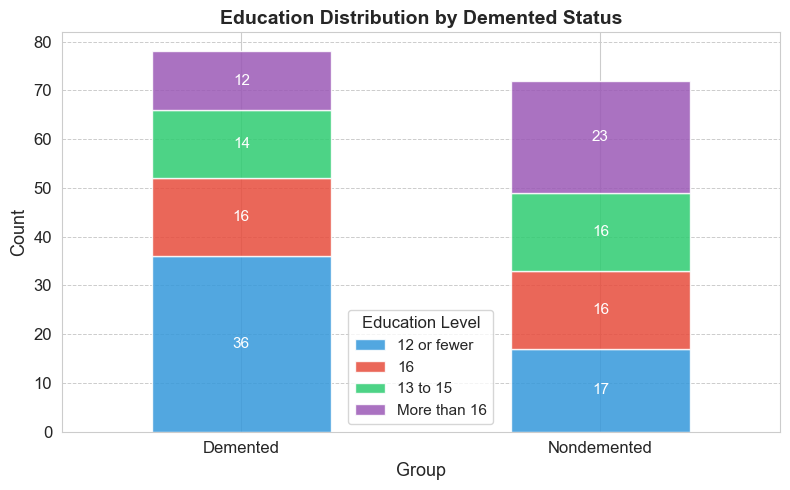

In [19]:
def bar_chart(
    feature,
    title="Education Distribution by Demented Status",
    xlabel="Group",
    ylabel="Count",
):
    Demented = ex_data[ex_data["Group"] == "Demented"][feature].value_counts()
    Nondemented = ex_data[ex_data["Group"] == "Nondemented"][feature].value_counts()

    data_bar = pd.DataFrame([Demented, Nondemented]).fillna(0)
    data_bar.index = ["Demented", "Nondemented"]

    ax = data_bar.plot(
        kind="bar",
        stacked=True,
        figsize=(8, 5),
        color=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"],
        alpha=0.85,
    )

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(
                    f"{int(height)}",
                    (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha="center",
                    va="center",
                    fontsize=11,
                    color="white",
                )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.tick_params(axis="x", labelsize=12, rotation=0)
    ax.tick_params(axis="y", labelsize=12)
    ax.legend(title=feature, fontsize=11, title_fontsize=12)
    ax.grid(visible=True, which="major", axis="y", linestyle="--", linewidth=0.7)

    print(data_bar)
    plt.tight_layout()
    plt.show()


def categorize_education(education):
    if education <= 12:
        return "12 or fewer"
    elif 13 <= education <= 15:
        return "13 to 15"
    elif education == 16:
        return "16"
    else:
        return "More than 16"


ex_data = data.loc[data["Visit"] == 1].copy()
data["Group"] = data["Group"].replace("Converted", "Demented")
ex_data["Group"] = ex_data["Group"].replace("Converted", "Demented")
ex_data["Education Level"] = ex_data["EDUC"].apply(categorize_education)

bar_chart(
    feature="Education Level",
    xlabel="Group",
    ylabel="Count",
)

#### Comparisom
The scatter plot reveals no evident distinction between male and female distributions across age and years of education. This initial observation suggests that there may be no significant gender-based differences in these variables. However, it is crucial to emphasise that visual inspection alone is insufficient for drawing definitive conclusions. While the scatter plot offers an overview, it does not account for potential subtle differences or confounding factors that may influence the relationship between gender, age, and education. Consequently, to rigorously assess whether gender differences exist, we will conduct T-tests for both age and education level across genders. This statistical approach will allow for a more comprehensive analysis, controlling for variability and providing deeper insight into whether observed trends hold up under more robust testing. Such an analysis will be crucial for drawing more precise conclusions about gender disparities in age and education within this dataset.

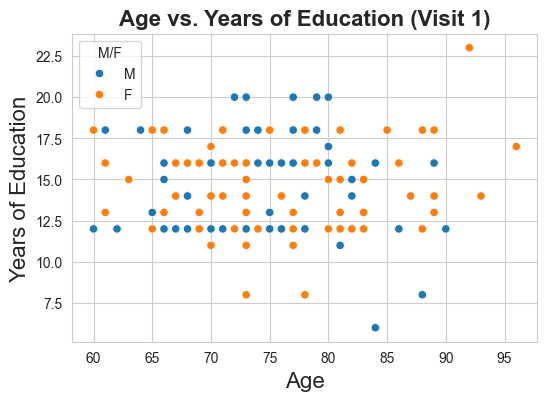

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Age", y="EDUC", data=ex_data, hue="M/F", palette="tab10")
plt.title("Age vs. Years of Education (Visit 1)", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=16)
plt.ylabel("Years of Education", fontsize=16)
plt.show()

The T-test for Age by Gender compared the mean Age between males and females in the dataset, testing the null hypothesis that there is no difference in the average age between the two genders. The T-statistic of -0.727 indicates that the observed difference between male and female age is relatively small. The P-value of 0.468 is well above the typical significance threshold of 0.05, suggesting that there is no statistically significant difference in the mean age between males and females in this dataset. This indicates that gender may not have a major influence on age differences within the cohort.

In [21]:
male_age = ex_data[ex_data["M/F"] == "M"]["Age"]
female_age = ex_data[ex_data["M/F"] == "F"]["Age"]

t_stat, p_val = stats.ttest_ind(male_age, female_age)
print("T-test for Age by Gender")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-test for Age by Gender
T-statistic: -0.7613028102243085, P-value: 0.4476875675161134


The T-test for Level of Education by Gender was performed to compare the mean years of education (EDUC) between males and females. Although the T-statistic is relatively large, suggesting some difference between the education levels of males and females, the P-value indicates that this difference is not statistically significant. It’s possible that there could be a small but non-significant gender gap in educational attainment in this dataset. The lack of significance may suggest that gender does not strongly impact education levels in this cohort, or that the sample size might not be large enough to detect a small difference.

In [22]:
male_educ = ex_data[ex_data["M/F"] == "M"]["EDUC"]
female_educ = ex_data[ex_data["M/F"] == "F"]["EDUC"]

t_stat, p_val = stats.ttest_ind(male_educ, female_educ)
print("T-test for Level of Education by Gender")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-test for Level of Education by Gender
T-statistic: 0.860581797305536, P-value: 0.39086039643067083


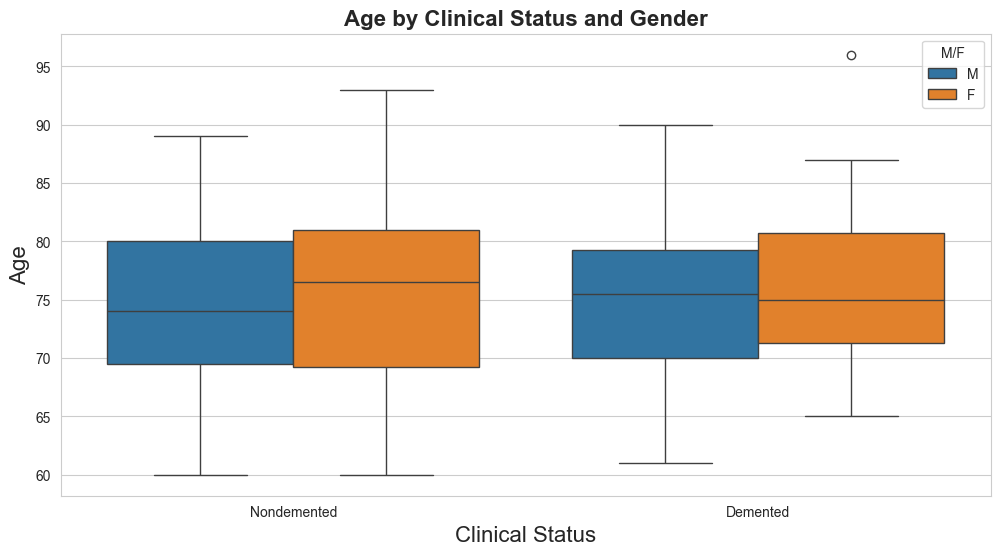

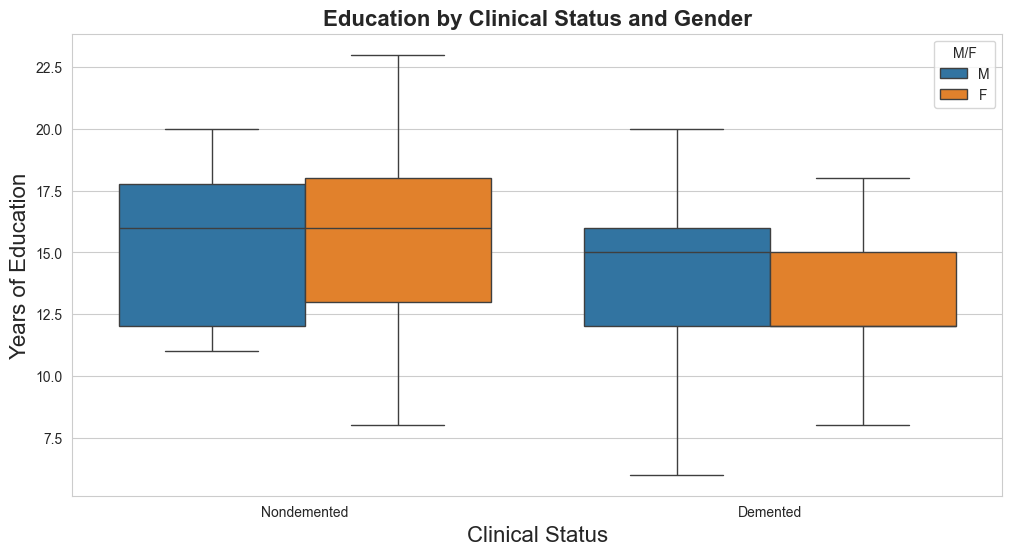

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Group", y="Age", hue="M/F", data=ex_data, palette="tab10")
plt.title("Age by Clinical Status and Gender", fontsize=16, fontweight="bold")
plt.xlabel("Clinical Status", fontsize=16,)
plt.ylabel("Age", fontsize=16,)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Group", y="EDUC", hue="M/F", data=ex_data, palette="tab10")
plt.title("Education by Clinical Status and Gender", fontsize=16, fontweight="bold")
plt.xlabel("Clinical Status", fontsize=16,)
plt.ylabel("Years of Education", fontsize=16,)
plt.show()

### Outlier Detection Using IQR Method
The dataset was analysed for outliers in several key columns using the Interquartile Range (IQR) method to identify any extreme values that could skew the analysis.

The boxplots provide a visual representation of the distribution of data across multiple variables. The boxplots display the median, first quartile (Q1), third quartile (Q3), and the interquartile range, along with potential outliers. These outliers are defined as data points that lie beyond 1.5 times the IQR above the third quartile or below the first quartile. The identification and visualisation of outliers are essential for understanding the spread and variability of the data. Outliers may represent errors in data entry or unusual but valid observations, both of which can influence subsequent analyses.

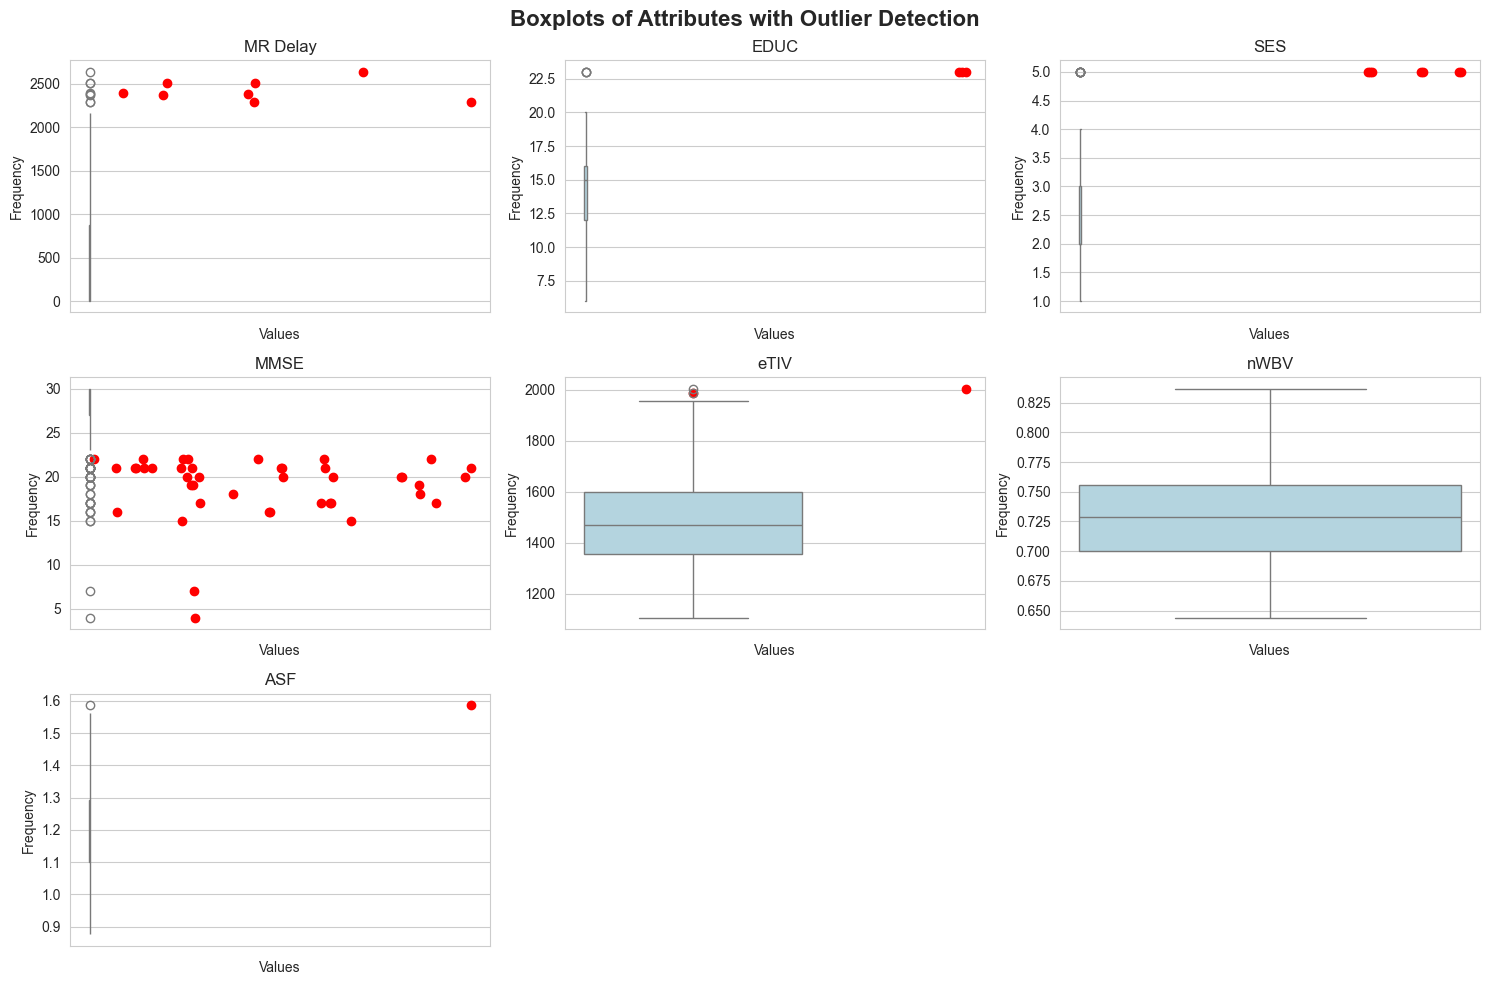


Outliers: 

MR Delay ⮕ [ 32  71  75 153 159 160 265 369]
EDUC ⮕ [107 108 109]
SES ⮕ [136 137 138 161 162 179 180]
MMSE ⮕ [  4  25  26  43  44  51  52  60  88  89  90  93  94  97  98  99 100 101
 105 106 138 162 172 173 184 185 186 222 225 226 231 232 234 251 299 300
 316 317 328 332 360 366]
eTIV ⮕ [0 1]
nWBV ⮕ []
ASF ⮕ [282]


In [24]:
def detect_outliers_iqr(values_to_check):
    if len(values_to_check) == 0:
        return np.array([])

    quartile_1, quartile_3 = np.percentile(values_to_check, [25, 75])
    iqr = quartile_3 - quartile_1

    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    return np.where((values_to_check < lower_bound) | (values_to_check > upper_bound))[0]


list_attributes = ["MR Delay", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]

plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots of Attributes with Outlier Detection", fontsize=16, fontweight='bold')


for i, item in enumerate(list_attributes):
    if item in data.columns:
        outliers_indices = detect_outliers_iqr(data[item].dropna().values)

        plt.subplot(3, 3, i + 1)
        sns.boxplot(data[item].dropna(), color="lightblue")

        plt.scatter(
            outliers_indices,
            data[item].dropna().iloc[outliers_indices],
            color="red",
            label="Outliers",
        )

        plt.title(item)
        plt.xlabel("Values")
        plt.ylabel("Frequency")
    else:
        print(f"{item}: Column not found in the dataset")

plt.tight_layout()
plt.show()

print("\nOutliers: \n")
for item in list_attributes:
    if item in data.columns:
        outliers_indices = detect_outliers_iqr(data[item].dropna().values)
        print(f"{item} ⮕ {outliers_indices}")
    else:
        print(f"{item}: Column not found in the dataset")

##### Pairplot of Numerical Attributes
The pairplot provides a thorough examination of the relationships between multiple variables by displaying scatter plots for each pair of selected attributes, with diagonal kernel density estimation (KDE) plots to show the univariate distribution of each variable. This enables a visual inspection of both the bivariate relationships (correlations) and the marginal distributions. Such visualisation is invaluable for detecting potential linear or non-linear associations between variables, as well as for spotting any apparent clusters, trends, or outliers.

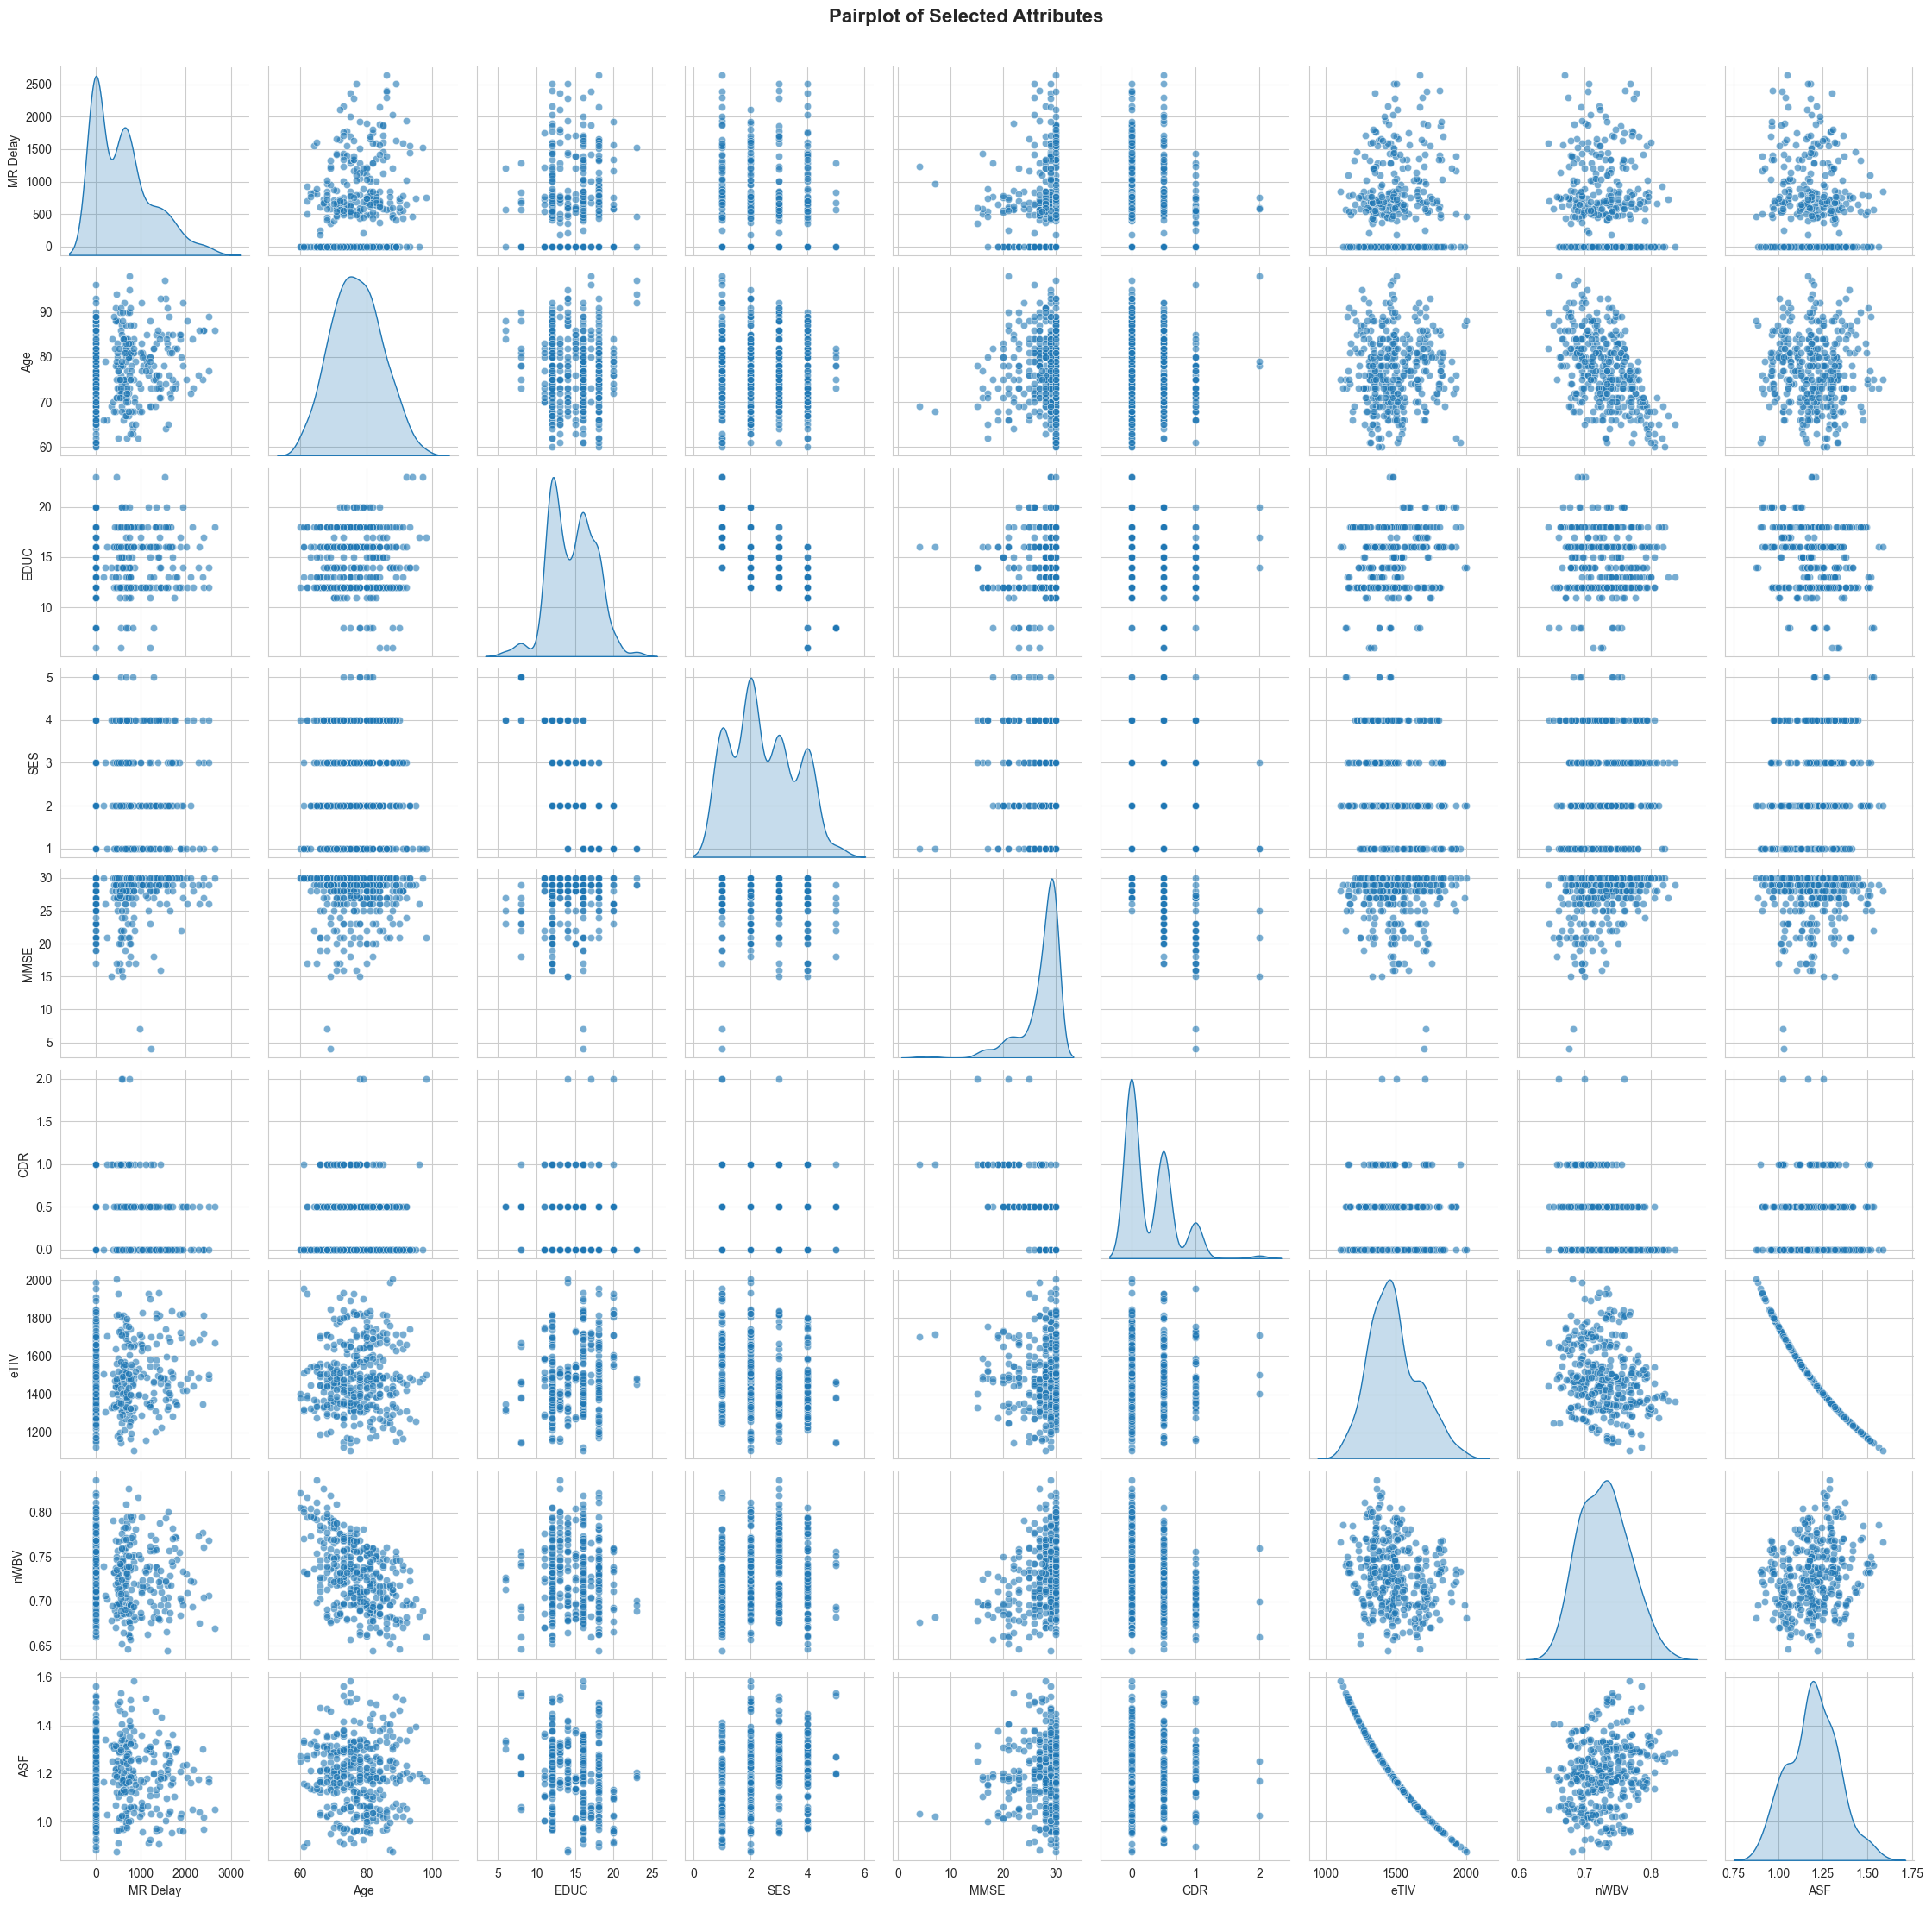

In [25]:
plt.rcParams["figure.figsize"] = (12, 12)

cols = ["MR Delay", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]

x = data.dropna(subset=cols)

sns_plot = sns.pairplot(
    x[cols],
    kind="scatter",  
    plot_kws={"alpha": 0.6},  
    diag_kind="kde", 
    markers="o"
)

sns_plot.figure.suptitle("Pairplot of Selected Attributes", fontsize=16, fontweight="bold")

sns_plot.figure.tight_layout()
sns_plot.figure.subplots_adjust(top=0.95)

plt.show()

To ensure that categorical data can be effectively analysed in the context of numerical methods, the categorical variables are converted into numeric values

In [ ]:
group_map = {"Demented": 1, "Nondemented": 0}

data["Group"] = data["Group"].map(group_map)
data["M/F"] = data["M/F"].replace({"F": 0, "M": 1}).astype(int)

##### Correlation Matrix Heatmap
The heatmap of the correlation matrix offers a compact and intuitive means of assessing the strength and direction of relationships between numeric variables. The correlation coefficient values, represented in varying colours, enable a quick visual inspection of the variables most strongly related to each other. A high positive or negative correlation suggests a potential linear relationship, while near-zero correlations indicate independence between variables. 

This tool is particularly useful for detecting multicollinearity in preparation for regression analysis, where highly correlated predictors could undermine the model's reliability. 

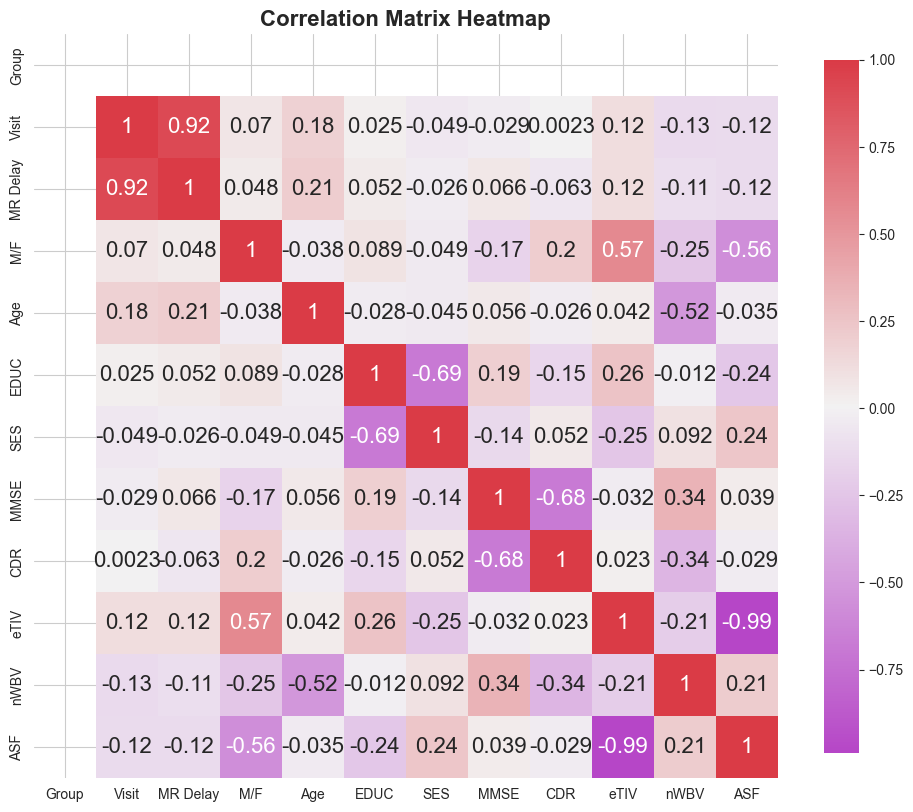

In [28]:
def visualise_correlation_matrix(dataset):
    numeric_columns = dataset.select_dtypes(include=["number"])

    correlation_matrix = numeric_columns.corr()

    plt.figure(figsize=(12, 10))

    colormap = sns.diverging_palette(300, 10, as_cmap=True)

    sns.heatmap(
        correlation_matrix,
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.9},
        annot=True,
        annot_kws={"fontsize": 16},
    )

    plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight="bold")

    plt.show()


visualise_correlation_matrix(data)

##### Top Correlations Bar Chart
The bar chart visualising the top correlations within the dataset further highlights the strongest linear relationships between pairs of variables. By sorting the correlation coefficients by absolute value, it facilitates the identification of the most significant associations. This representation is particularly useful for narrowing down variables that may warrant deeper analysis or inclusion in predictive models.

Some interesting top 10 correlations are:
- **ASF & eTIV (-0.99)**: A strong negative correlation suggests that higher ASF values are linked to lower eTIV, indicating an inverse relationship between these two brain measures.
- **MMSE & CDR (-0.68)**: A negative correlation aligns with expectations, as higher MMSE scores (better cognitive function) correlate with lower CDR scores (less severe dementia).
- **nWBV & Age (-0.52)**: A moderate negative correlation suggests that brain volume decreases with age, consistent with known age-related brain atrophy.
- **nWBV & CDR (-0.34)**: A moderate negative correlation indicates that lower brain volume is associated with higher dementia severity.
- **MMSE & nWBV (0.34)**: A weak positive correlation suggests that larger brain volumes are associated with better cognitive function.

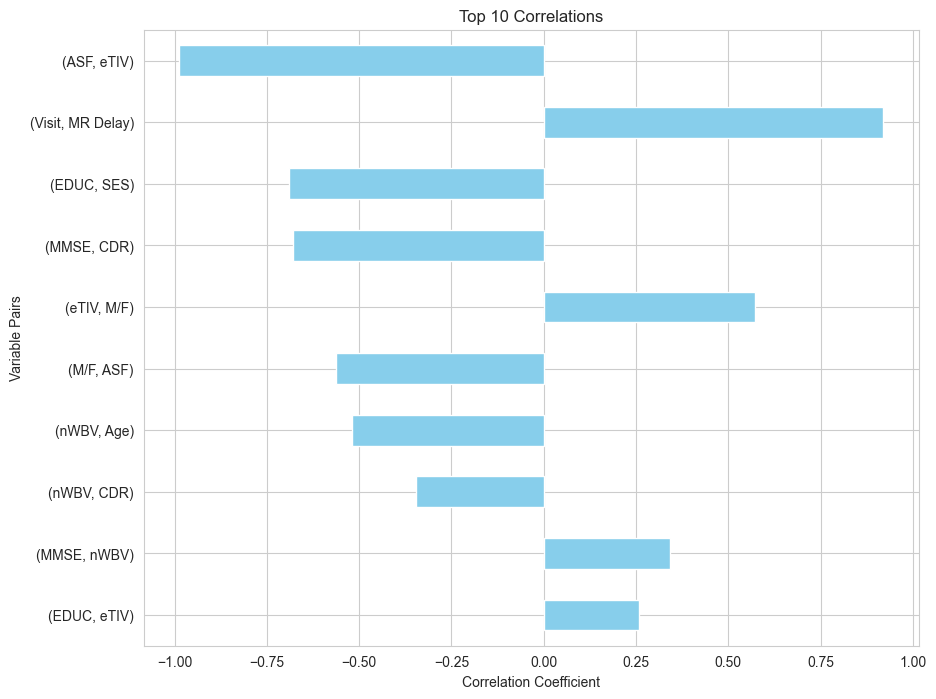

In [29]:
def visualise_top_correlations_bar_chart(dataset, top_n=10):
    numeric_columns = dataset.select_dtypes(include=["number"])
    correlation_matrix = numeric_columns.corr()

    corr_pairs = (
        correlation_matrix.unstack()
        .sort_values(kind="quicksort", key=abs, ascending=False)
        .drop_duplicates()
    )

    top_corr_pairs = corr_pairs[
        corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)
    ].head(top_n)

    top_corr_pairs.plot(kind="barh", color="skyblue", figsize=(10, 8))
    plt.title(f"Top {top_n} Correlations")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Variable Pairs")
    plt.gca().invert_yaxis()
    plt.show()


visualise_top_correlations_bar_chart(data)

##### Scatterplot Matrix with Density Diagonals
The scatterplot matrix with density diagonals complements the previous visualisation by focusing on bivariate relationships between numeric variables. Each scatter plot shows the pairwise relationships between variables, while the density plots on the diagonal represent the univariate distribution of each variable.

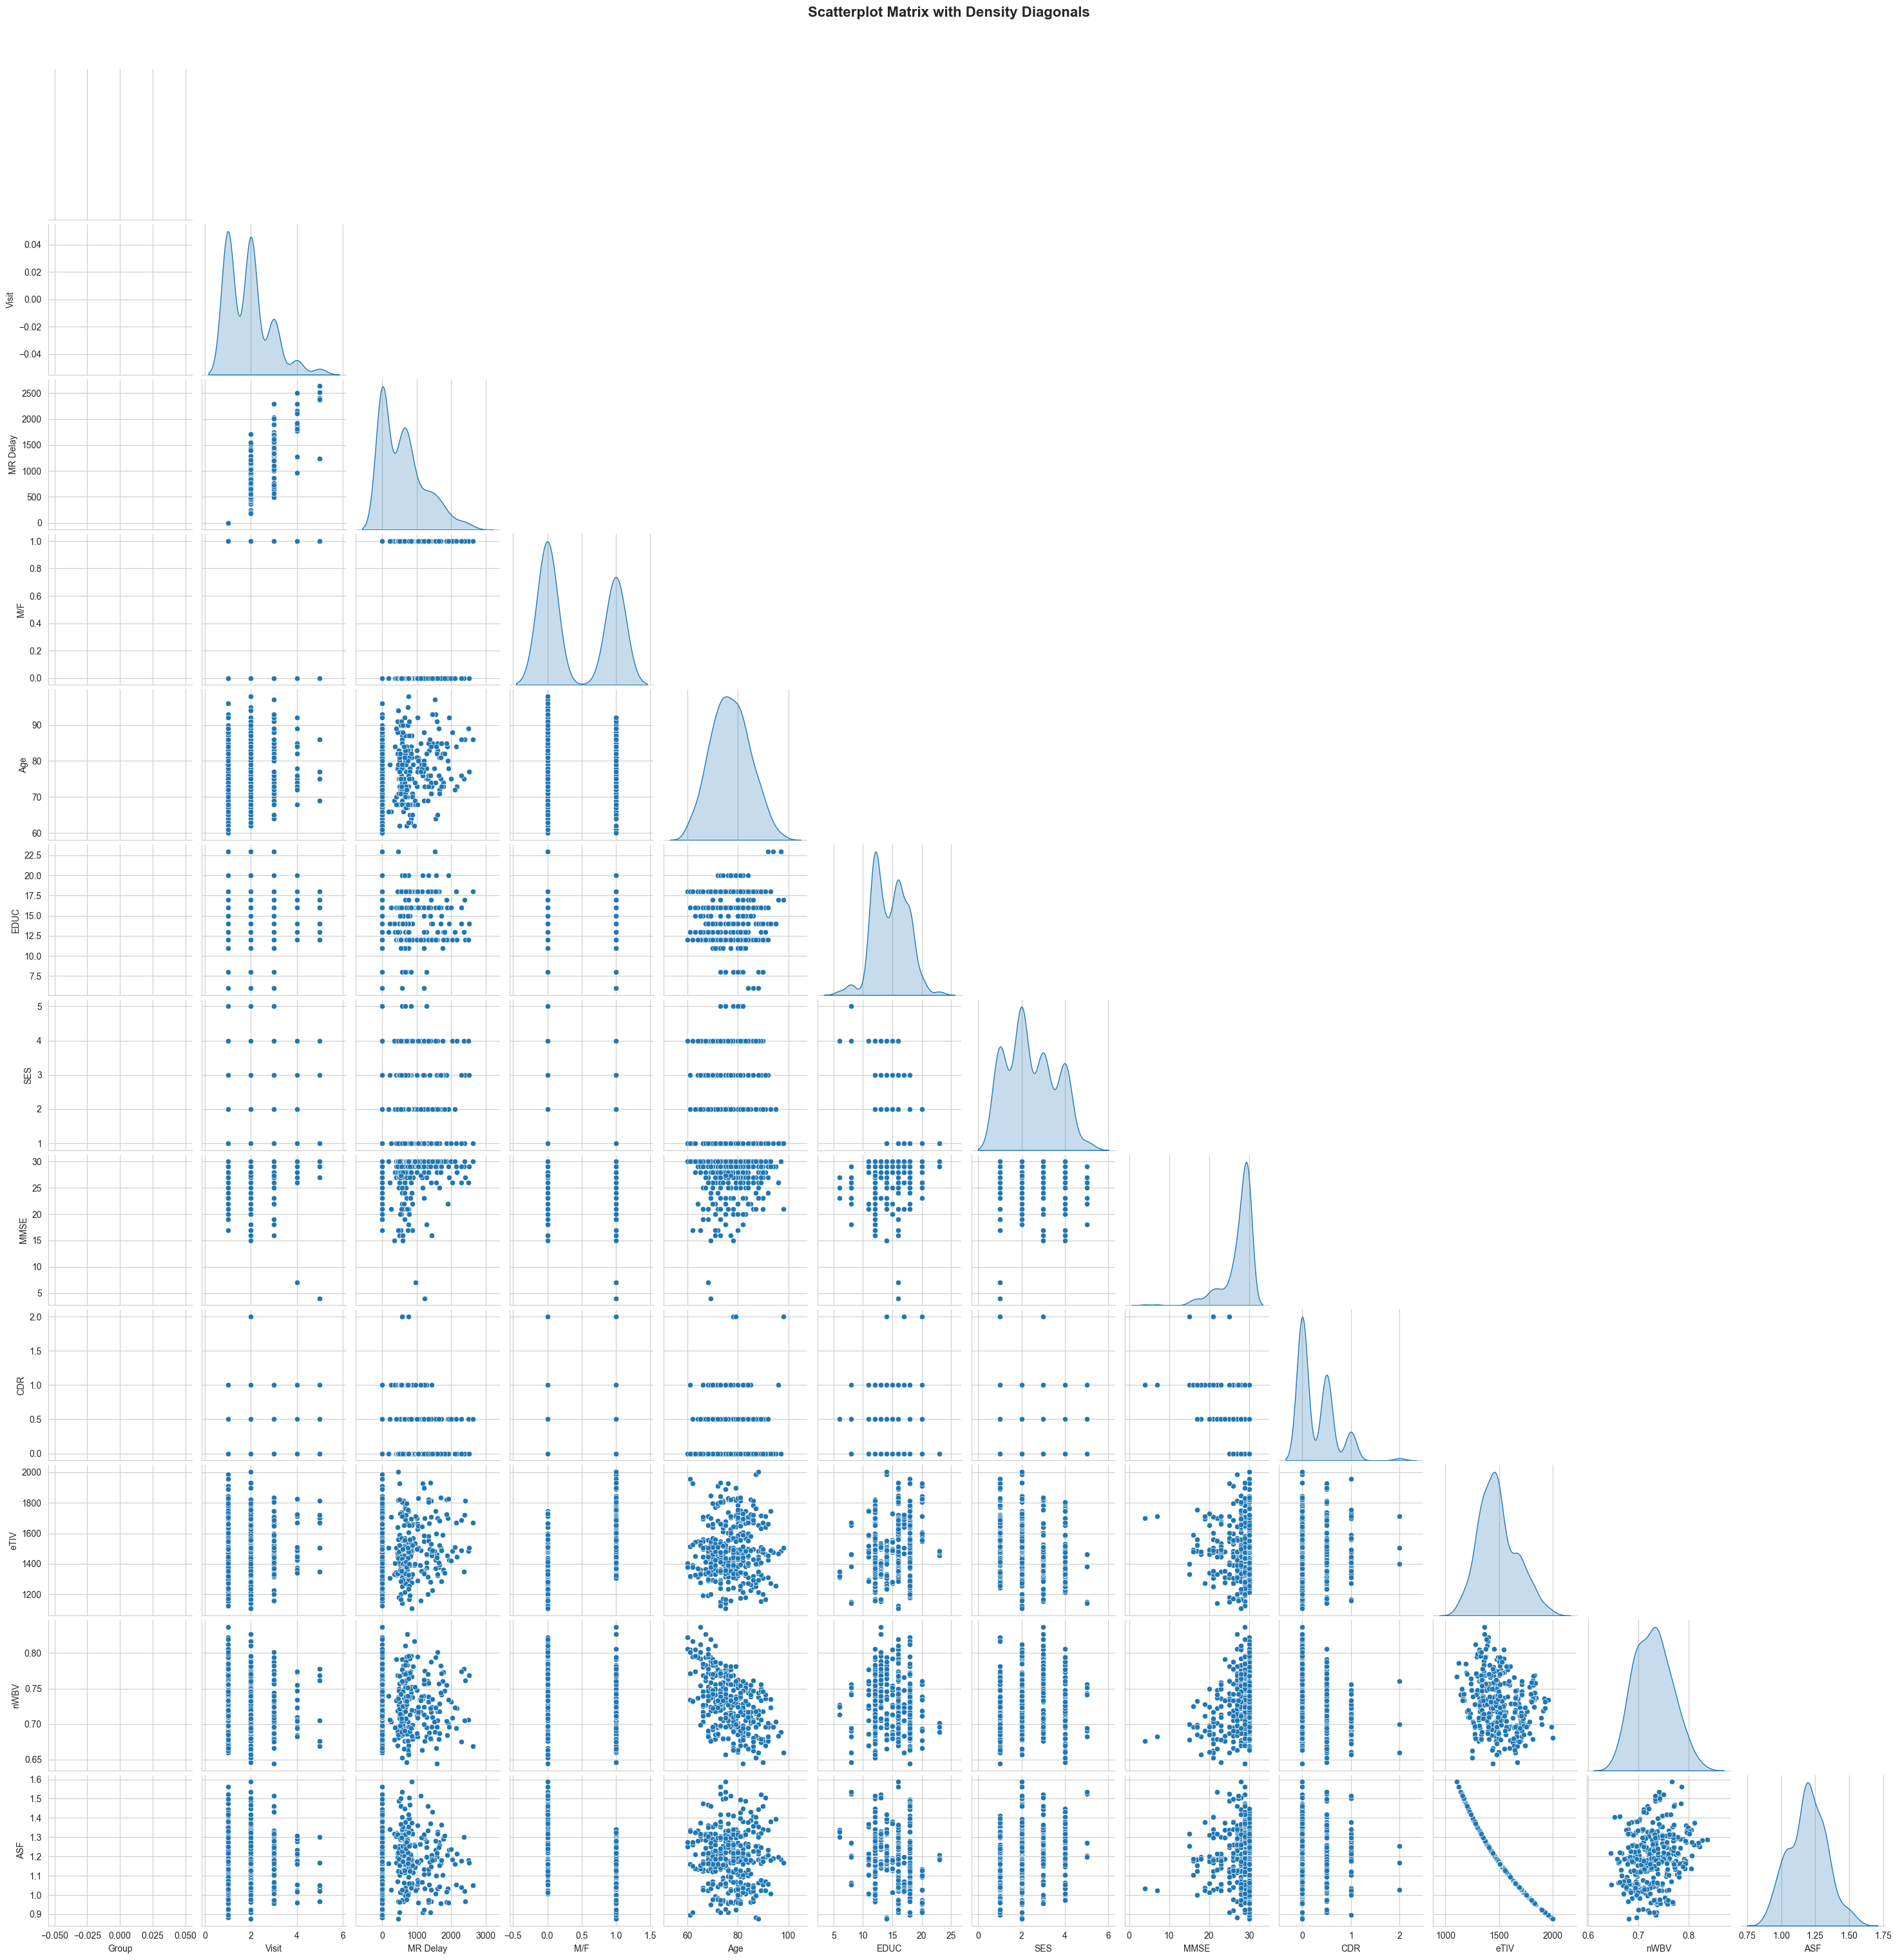

In [30]:
def visualise_scatterplot_matrix(dataset):
    numeric_columns = dataset.select_dtypes(include=["number"])

    sns.pairplot(numeric_columns, diag_kind="kde", corner=True)

    plt.suptitle(
        "Scatterplot Matrix with Density Diagonals",
        y=1.02,
        fontsize=16,
        fontweight="bold",
    )
    plt.show()


visualise_scatterplot_matrix(data)

## References:
Beheshti, I., Mishra, S., Sone, D., Khanna, P. and Matsuda, H. (2020) ‘T1-weighted MRI-driven Brain Age Estimation in Alzheimer’s Disease and Parkinson’s Disease’, Aging and disease, 11(3), pp. 618–628. Available at: https://doi.org/10.14336/AD.2019.0617

Ferretti, M.T., Martinkova, J., Biskup, E., Benke, T., Gialdini, G., Nedelska, Z., Rauen, K., Mantua, V., Religa, D., Hort, J., Santuccione Chadha, A. and Schmidt, R. (2020) ‘Sex and gender differences in Alzheimer’s disease: current challenges and implications for clinical practice: Position paper of the Dementia and Cognitive Disorders Panel of the European Academy of Neurology’, European journal of neurology, 27(6), pp. 928–943. Available at: https://doi.org/10.1111/ene.14174

Franke, K., Ziegler, G., Klöppel, S. and Gaser, C. (2010) ‘Estimating the age of healthy subjects from T1-weighted MRI scans using kernel methods: Exploring the influence of various parameters’, NeuroImage (Orlando, Fla.), 50(3), pp. 883–892. Available at: https://doi.org/10.1016/j.neuroimage.2010.01.005

Jun, B.S., Kim, K.M., Yang, H.J. and Park, J.H. (2023) ‘Association Between Executive Dysfunction-Related Activities of Daily Living Disability and Clinical Dementia Rating Domain Patterns in Patients With Vascular Dementia and Age-Matched Patients With Alzheimer’s Dementia’, Psychiatry investigation, 20(12), pp. 1126–1132. Available at: https://doi.org/10.30773/pi.2023.0092

Kolahchi, Z., Henkel, N., Eladawi, M.A., Villarreal, E.C., Kandimalla, P., Lundh, A., McCullumsmith, R.E. and Cuevas, E. (2024) ‘Sex and Gender Differences in Alzheimer’s Disease: Genetic, Hormonal, and Inflammation Impacts’, International journal of molecular sciences, 25(15), pp. 8485-. Available at: https://doi.org/10.3390/ijms25158485

Lin, K.A., Choudhury, K.R., Rathakrishnan, B.G., Marks, D.M., Petrella, J.R. and Doraiswamy, P.M. (2015) ‘Marked gender differences in progression of mild cognitive impairment over 8 years’, Alzheimer’s & dementia : translational research & clinical interventions, 1(2), pp. 103–110. Available at: https://doi.org/10.1016/j.trci.2015.07.001